<a href="https://colab.research.google.com/github/maplerivertree/notes-9781787125933/blob/master/decision_tree_with_pydotplus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

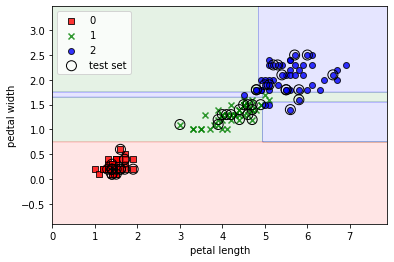

In [5]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 821150)

tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))


plot_decision_regions(X_combined, y_combined, classifier = tree, test_idx = range(105, 150))
plt.xlabel('petal length')
plt.ylabel('pedtal width')
plt.legend(loc='best')
plt.show()


In [0]:
# install pydotplus.
# > pip3 install pydotplus

In [10]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree, filled = True, class_names = ['setosa', 'versicolor', 'virginica'], feature_names = ['pedtal length', 'pedtal width'], out_file = None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

In [0]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'green', 'blue', 'black', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:, 0].min() - 1, X[:,0].max() +1
  x2_min, x2_max = X[:, 1].min() - 1, X[:,1].max() +1

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
  Z= classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z=Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha = 0.1, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl, 0], y = X[y==cl, 1], alpha = 0.8, c= colors[idx], marker=markers[idx], label=cl, edgecolor='black')
    
  if test_idx:
    X_test, y_test = X[test_idx, :], y[test_idx]

    plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolor='black', alpha= 1.0, linewidth = 1, marker = 'o', s= 100, label = 'test set')

In [2]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print('Class labels:', np.unique(y))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 821150, stratify = y)

Class labels: [0 1 2]
